In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/myanimelist-dataset-animes-profiles-reviews/animes.csv
/kaggle/input/myanimelist-dataset-animes-profiles-reviews/profiles.csv
/kaggle/input/myanimelist-dataset-animes-profiles-reviews/reviews.csv


In [2]:
# Import all the important libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast
sns.set()
%matplotlib inline
import scipy.stats as stats
pd.set_option('display.max_column', None)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Load all the datsets
df_animes=pd.read_csv('/kaggle/input/myanimelist-dataset-animes-profiles-reviews/animes.csv')
df_profiles=pd.read_csv('/kaggle/input/myanimelist-dataset-animes-profiles-reviews/profiles.csv')
df_reviews=pd.read_csv('/kaggle/input/myanimelist-dataset-animes-profiles-reviews/reviews.csv')

In [4]:
# Getting to find out the shape of datasets
df_animes.shape

(19311, 12)

In [5]:
df_animes.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [6]:
# Check the datatypes of the following datasets
df_animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
 10  img_url     19131 non-null  object 
 11  link        19311 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


In [7]:
df_profiles.shape

(81727, 5)

In [8]:
df_profiles.head()

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99


In [9]:
df_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81727 entries, 0 to 81726
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   profile          81727 non-null  object
 1   gender           53856 non-null  object
 2   birthday         46807 non-null  object
 3   favorites_anime  81727 non-null  object
 4   link             81727 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB


In [10]:
df_reviews.shape

(192112, 7)

In [11]:
df_reviews.head()

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149


In [12]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192112 entries, 0 to 192111
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   uid        192112 non-null  int64 
 1   profile    192112 non-null  object
 2   anime_uid  192112 non-null  int64 
 3   text       192112 non-null  object
 4   score      192112 non-null  int64 
 5   scores     192112 non-null  object
 6   link       192112 non-null  object
dtypes: int64(3), object(4)
memory usage: 10.3+ MB


In [13]:
df_animes.value_counts("genre")

genre
['Hentai']                                                           1837
['Music']                                                             728
['Comedy']                                                            642
['Kids']                                                              412
['Dementia']                                                          202
                                                                     ... 
['Action', 'Military', 'Comedy', 'Romance']                             1
['Comedy', 'Vampire', 'Shoujo']                                         1
['Action', 'Military', 'Comedy', 'Historical']                          1
['Dementia', 'Demons']                                                  1
['Comedy', 'Ecchi', 'Harem', 'Sci-Fi', 'Shounen', 'Supernatural']       1
Length: 4851, dtype: int64

In [14]:
df_animes.loc[(df_animes.uid == 33352)]

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
730,33352,Violet Evergarden,The Great War finally came to an end after fou...,"['Slice of Life', 'Drama', 'Fantasy']","Jan 11, 2018 to Apr 5, 2018",13.0,635262,87,61.0,8.62,https://cdn.myanimelist.net/images/anime/1795/...,https://myanimelist.net/anime/33352/Violet_Eve...
17503,33352,Violet Evergarden,The Great War finally came to an end after fou...,"['Slice of Life', 'Drama', 'Fantasy']","Jan 11, 2018 to Apr 5, 2018",13.0,635262,87,61.0,8.62,https://cdn.myanimelist.net/images/anime/1795/...,https://myanimelist.net/anime/33352/Violet_Eve...


In [15]:
# Convert the string representation of lists in the 'favorites_anime' column to actual lists
df_animes['genre'] = df_animes['genre'].apply(ast.literal_eval)

# "Explode" the lists in the 'favorites_anime' column into separate rows
df_animes = df_animes.explode('genre').reset_index()


In [16]:
df_animes.head(23)

,index,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,Comedy,"Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,Sports,"Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
2,0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,Drama,"Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
3,0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,School,"Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
4,0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,Shounen,"Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
5,1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,Drama,"Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
6,1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,Music,"Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
7,1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,Romance,"Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
8,1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,School,"Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
9,1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,Shounen,"Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...


In [17]:
# Convert the string representation of lists in the 'favorites_anime' column to actual lists
df_profiles['favorites_anime'] = df_profiles['favorites_anime'].apply(ast.literal_eval)

# "Explode" the lists in the 'favorites_anime' column into separate rows
df_profiles = df_profiles.explode('favorites_anime').reset_index()


In [18]:
df_profiles.head(23)

,index,profile,gender,birthday,favorites_anime,link
0,0,DesolatePsyche,Male,"Oct 2, 1994",33352,https://myanimelist.net/profile/DesolatePsyche
1,0,DesolatePsyche,Male,"Oct 2, 1994",25013,https://myanimelist.net/profile/DesolatePsyche
2,0,DesolatePsyche,Male,"Oct 2, 1994",5530,https://myanimelist.net/profile/DesolatePsyche
3,0,DesolatePsyche,Male,"Oct 2, 1994",33674,https://myanimelist.net/profile/DesolatePsyche
4,0,DesolatePsyche,Male,"Oct 2, 1994",1482,https://myanimelist.net/profile/DesolatePsyche
5,0,DesolatePsyche,Male,"Oct 2, 1994",269,https://myanimelist.net/profile/DesolatePsyche
6,0,DesolatePsyche,Male,"Oct 2, 1994",18245,https://myanimelist.net/profile/DesolatePsyche
7,0,DesolatePsyche,Male,"Oct 2, 1994",2904,https://myanimelist.net/profile/DesolatePsyche
8,0,DesolatePsyche,Male,"Oct 2, 1994",27899,https://myanimelist.net/profile/DesolatePsyche
9,0,DesolatePsyche,Male,"Oct 2, 1994",17074,https://myanimelist.net/profile/DesolatePsyche


In [19]:
df_profiles.value_counts("favorites_anime")

favorites_anime
5114     8966
9253     8312
1535     6078
11061    5761
4181     5009
         ... 
34383       1
6637        1
2259        1
34402       1
31610       1
Length: 4768, dtype: int64

In [20]:
df_reviews.head(7)

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149
5,10046,eneri,2904,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '9', 'Animation': '...",https://myanimelist.net/reviews.php?id=10046
6,247454,Waffle_Empress,16664,\n \n \n \n ...,6,"{'Overall': '6', 'Story': '6', 'Animation': '9...",https://myanimelist.net/reviews.php?id=247454


In [21]:
# Split all the columns 
score_columns = ['Overall', 'Story', 'Animation', 'Sound', 'Character', 'Enjoyment']
for col in score_columns:
    df_reviews[col + '_Scores'] = df_reviews['scores'].apply(lambda x: int(eval(x)[col]))

In [22]:
df_reviews.head(7)

,uid,profile,anime_uid,text,score,scores,link,Overall_Scores,Story_Scores,Animation_Scores,Sound_Scores,Character_Scores,Enjoyment_Scores
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938,8,8,8,10,9,8
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117,10,10,10,10,10,10
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,7,7,9,8,8,8
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254,9,9,9,10,10,9
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149,10,10,8,9,10,10
5,10046,eneri,2904,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '9', 'Animation': '...",https://myanimelist.net/reviews.php?id=10046,10,9,10,10,10,10
6,247454,Waffle_Empress,16664,\n \n \n \n ...,6,"{'Overall': '6', 'Story': '6', 'Animation': '9...",https://myanimelist.net/reviews.php?id=247454,6,6,9,8,6,6


**Research Questions**

Q. How does the gender of the user influence their preference for different anime genres?

<Axes: xlabel='gender', ylabel='count'>

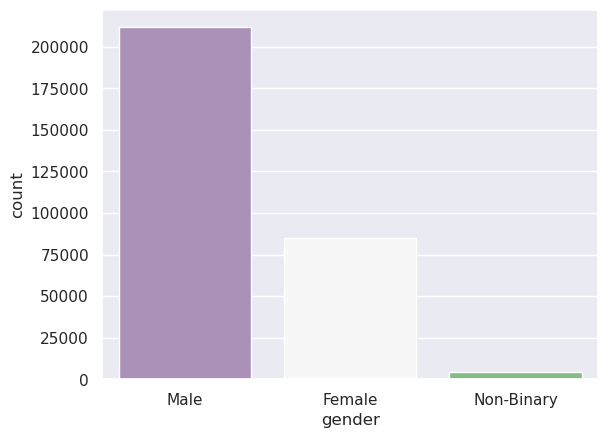

In [23]:
sns.countplot(x=df_profiles['gender'],palette="PRGn")

In [24]:
df_animes.genre.unique()

array(['Comedy', 'Sports', 'Drama', 'School', 'Shounen', 'Music',
       'Romance', 'Sci-Fi', 'Adventure', 'Mystery', 'Fantasy', 'Action',
       'Military', 'Magic', 'Supernatural', 'Vampire', 'Slice of Life',
       'Demons', 'Historical', 'Super Power', 'Mecha', 'Parody',
       'Samurai', 'Seinen', 'Police', 'Psychological', 'Josei', 'Space',
       'Kids', 'Shoujo Ai', 'Ecchi', 'Shoujo', 'Horror', 'Shounen Ai',
       'Cars', 'Martial Arts', 'Game', 'Thriller', 'Dementia', 'Harem',
       nan, 'Hentai', 'Yaoi', 'Yuri'], dtype=object)

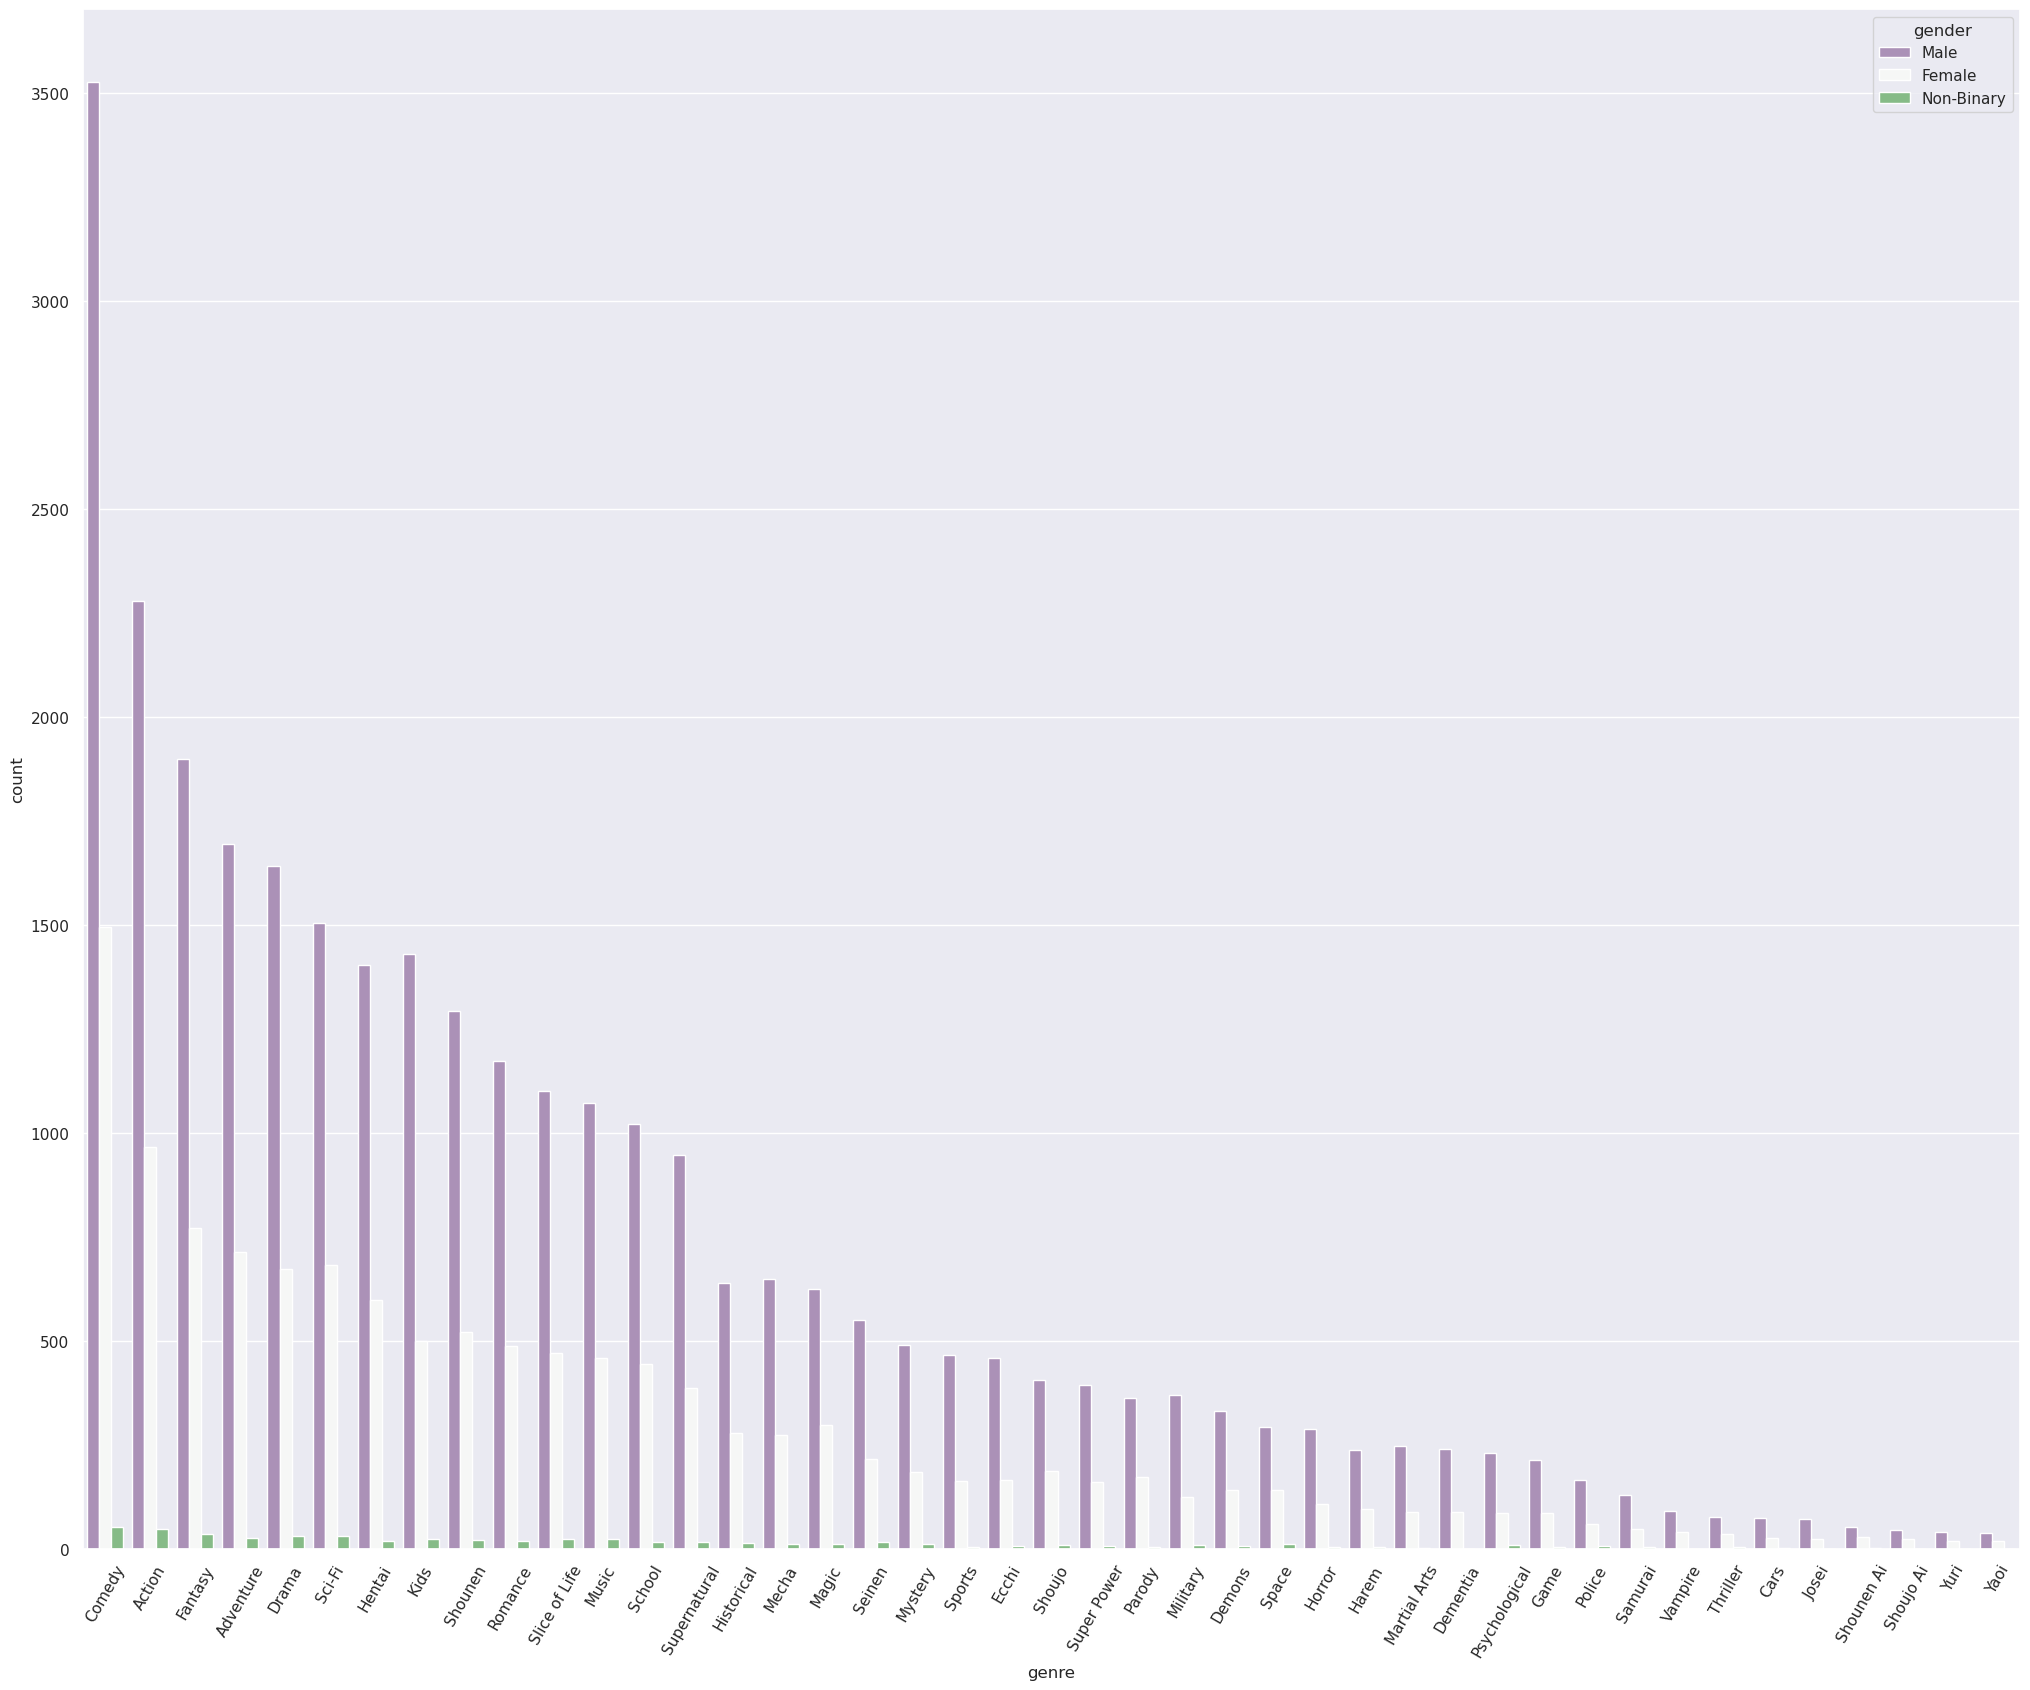

In [25]:
genre_counts = df_animes['genre'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(25, 20))  # Adjust the width and height as needed
sns.countplot(x=df_animes['genre'], palette="PRGn", hue=df_profiles.gender,order=genre_counts.index)
plt.xticks(rotation=60)  # Rotate the x-axis labels by 45 degrees
plt.show()

Q.	Are there significant differences in the ratings given by male and female users for specific anime genres?

In [26]:
df_animes.sample()


,index,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
36017,12451,37928,Mu Wang Zhi Wang: Han Tie Dou,NaN,Martial Arts,"May 11, 2017 to Sep 21, 2017",21.0,204,13415,13151.0,7.1,https://cdn.myanimelist.net/images/anime/1194/...,https://myanimelist.net/anime/37928/Mu_Wang_Zh...


In [27]:
df_profiles.sample()

,index,profile,gender,birthday,favorites_anime,link
131679,26291,DragonsWhip,Female,"Aug 15, 1991",2966,https://myanimelist.net/profile/DragonsWhip


In [28]:
df_reviews.sample()

,uid,profile,anime_uid,text,score,scores,link,Overall_Scores,Story_Scores,Animation_Scores,Sound_Scores,Character_Scores,Enjoyment_Scores
38833,321808,Hamidabel,33352,\n \n \n \n ...,6,"{'Overall': '6', 'Story': '6', 'Animation': '1...",https://myanimelist.net/reviews.php?id=321808,6,6,10,10,6,7


In [29]:
df_profiles.gender.unique()

array(['Male', 'Female', nan, 'Non-Binary'], dtype=object)

In [30]:
df_animes.shape,df_reviews.shape

((55663, 13), (192112, 13))

In [31]:
# First, merge the two DataFrames based on the uid & anime_uid column
#merged_df = pd.merge(df_animes, df_reviews, left_on='uid', right_on='anime_uid',how="inner")
merged_df=df_animes.merge(df_reviews,left_on='uid',right_on='anime_uid',how="inner").merge(df_profiles,left_on='profile',right_on='profile',how="inner")

In [32]:
merged_df.head()

,index_x,uid_x,title,synopsis,genre,aired,episodes,members,popularity,ranked,score_x,img_url,link_x,uid_y,profile,anime_uid,text,score_y,scores,link_y,Overall_Scores,Story_Scores,Animation_Scores,Sound_Scores,Character_Scores,Enjoyment_Scores,index_y,gender,birthday,favorites_anime,link
0,0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,Comedy,"Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,7,7,9,8,8,8,2,NaN,NaN,918,https://myanimelist.net/profile/skrn
1,0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,Comedy,"Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,7,7,9,8,8,8,2,NaN,NaN,2904,https://myanimelist.net/profile/skrn
2,0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,Comedy,"Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,7,7,9,8,8,8,2,NaN,NaN,11741,https://myanimelist.net/profile/skrn
3,0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,Comedy,"Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,7,7,9,8,8,8,2,NaN,NaN,17074,https://myanimelist.net/profile/skrn
4,0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,Comedy,"Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,7,7,9,8,8,8,2,NaN,NaN,23273,https://myanimelist.net/profile/skrn


In [33]:
merged_df.shape

(21138920, 31)

In [34]:
# Next, filter the merged DataFrame for male and female users separately
male_ratings = merged_df[merged_df['gender'] == 'Male']['score_x']
female_ratings = merged_df[merged_df['gender'] == 'Female']['score_x']

In [35]:
# Now, you can perform a t-test to compare the ratings of male and female users for each genre
unique_genres = df_animes['genre'].unique()

for genre in unique_genres:
    male_genre_ratings = male_ratings[merged_df['genre'] == genre]
    female_genre_ratings = female_ratings[merged_df['genre'] == genre]
    
    # Perform the t-test
    t_stat, p_value = stats.ttest_ind(male_genre_ratings, female_genre_ratings)
    
    # Determine if there is a significant difference based on the p-value (usually 0.05 is used as the significance level)
    if p_value < 0.05:
        print(f"There is a significant difference in ratings for the genre '{genre}'.")
    else:
        print(f"There is no significant difference in ratings fo the genre '{genre}'.")



There is a significant difference in ratings for the genre 'Comedy'.
There is a significant difference in ratings for the genre 'Sports'.
There is a significant difference in ratings for the genre 'Drama'.
There is a significant difference in ratings for the genre 'School'.
There is no significant difference in ratings fo the genre 'Shounen'.
There is a significant difference in ratings for the genre 'Music'.
There is a significant difference in ratings for the genre 'Romance'.
There is a significant difference in ratings for the genre 'Sci-Fi'.
There is a significant difference in ratings for the genre 'Adventure'.
There is a significant difference in ratings for the genre 'Mystery'.
There is a significant difference in ratings for the genre 'Fantasy'.
There is no significant difference in ratings fo the genre 'Action'.
There is a significant difference in ratings for the genre 'Military'.
There is no significant difference in ratings fo the genre 'Magic'.
There is a significant diffe

Q.	Does the gender of the user impact their rating distribution across different anime genres?

In [36]:
merged_df.columns

Index(['index_x', 'uid_x', 'title', 'synopsis', 'genre', 'aired', 'episodes',
       'members', 'popularity', 'ranked', 'score_x', 'img_url', 'link_x',
       'uid_y', 'profile', 'anime_uid', 'text', 'score_y', 'scores', 'link_y',
       'Overall_Scores', 'Story_Scores', 'Animation_Scores', 'Sound_Scores',
       'Character_Scores', 'Enjoyment_Scores', 'index_y', 'gender', 'birthday',
       'favorites_anime', 'link'],
      dtype='object')

In [37]:
merged_df.sample(2)

,index_x,uid_x,title,synopsis,genre,aired,episodes,members,popularity,ranked,score_x,img_url,link_x,uid_y,profile,anime_uid,text,score_y,scores,link_y,Overall_Scores,Story_Scores,Animation_Scores,Sound_Scores,Character_Scores,Enjoyment_Scores,index_y,gender,birthday,favorites_anime,link
212993,17756,20583,Haikyuu!!,Inspired after watching a volleyball ace nickn...,Sports,"Apr 6, 2014 to Sep 21, 2014",25.0,684654,75,56.0,8.62,https://cdn.myanimelist.net/images/anime/7/760...,https://myanimelist.net/anime/20583/Haikyuu,226184,Drevorn,20583,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '10', 'Animation': '...",https://myanimelist.net/reviews.php?id=226184,9,10,9,9,9,10,36270,Male,"Mar 20, 1995",31964,https://myanimelist.net/profile/Drevorn
10975668,5576,31229,Servamp,Mahiru Shirota firmly believes that simple is ...,Josei,"Jul 5, 2016 to Sep 20, 2016",12.0,154716,722,3614.0,7.05,https://cdn.myanimelist.net/images/anime/8/809...,https://myanimelist.net/anime/31229/Servamp,229641,AobaSuzukaze,31229,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '0', 'Animation': '0...",https://myanimelist.net/reviews.php?id=229641,8,0,0,0,0,0,2937,Male,"Apr 20, 1996",33206,https://myanimelist.net/profile/AobaSuzukaze


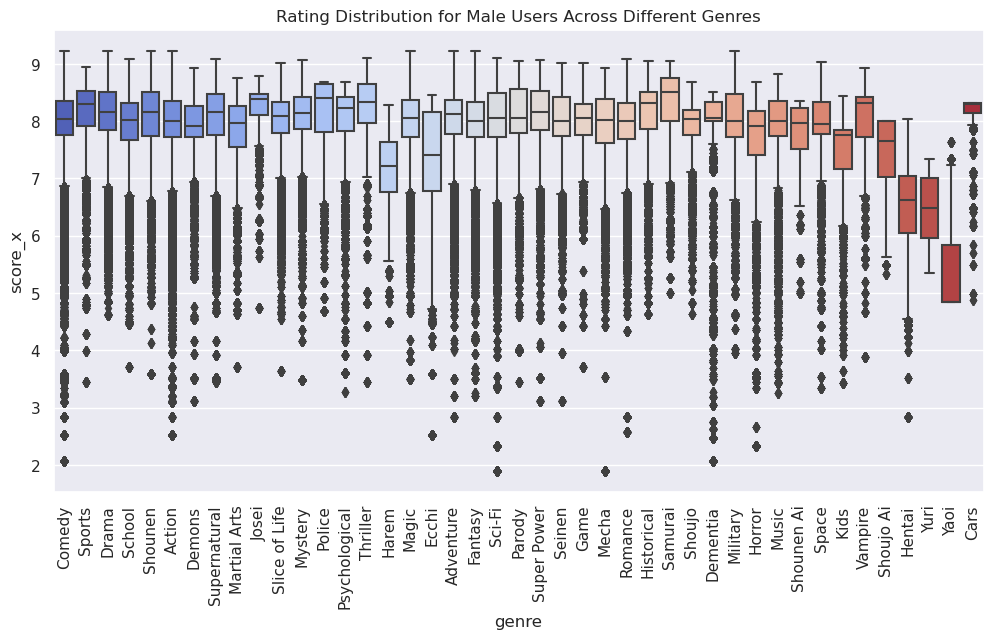

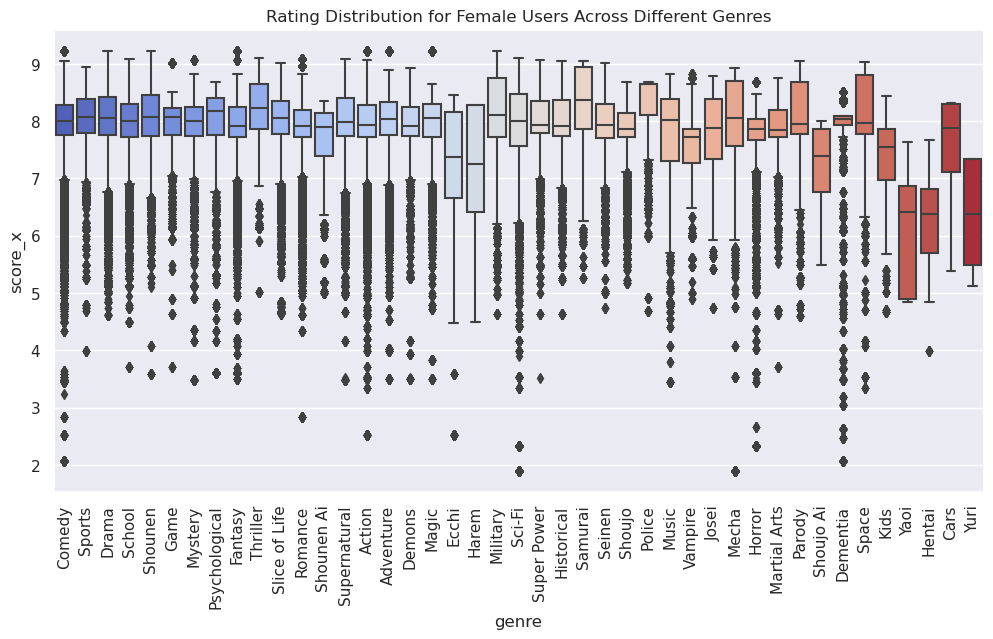

In [38]:
#Filter the DataFrame to include only relevant columns
df_filtered = merged_df[['score_x', 'genre', 'gender']]

#Create separate DataFrames for male and female users
male_ratings_df = df_filtered[df_filtered['gender'] == 'Male']
female_ratings_df = df_filtered[df_filtered['gender'] == 'Female']

#Visualize the rating distributions for each genre and gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=male_ratings_df, x='genre', y='score_x', palette='coolwarm')
plt.title("Rating Distribution for Male Users Across Different Genres")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=female_ratings_df, x='genre', y='score_x', palette='coolwarm')
plt.title("Rating Distribution for Female Users Across Different Genres")
plt.xticks(rotation=90)
plt.show()


Q.	Are there any gender-based variations in the popularity of specific anime genres?

In [39]:
# Group the data by 'genre' and 'gender' and calculate the average popularity
popularity_by_gender_genre = merged_df.groupby(['genre', 'gender'])['popularity'].mean().reset_index()

# Find the most popular genre for each gender
most_popular_genre_by_gender = popularity_by_gender_genre.loc[popularity_by_gender_genre.groupby('gender')['popularity'].idxmax()]

most_popular_genre_by_gender


,genre,gender,popularity
32,Hentai,Female,4836.954974
33,Hentai,Male,5096.665664
127,Yuri,Non-Binary,3612.166667


In [40]:
# Group the data by 'genre' and 'gender' and calculate the average popularity
popularity_by_gender_genre = merged_df.groupby(['genre', 'gender'])['popularity'].mean().reset_index()

# Find the most least genre for each gender
least_popular_genre_by_gender = popularity_by_gender_genre.loc[popularity_by_gender_genre.groupby('gender')['popularity'].idxmin()]

least_popular_genre_by_gender


,genre,gender,popularity
116,Thriller,Female,213.452681
117,Thriller,Male,244.350473
118,Thriller,Non-Binary,238.070202


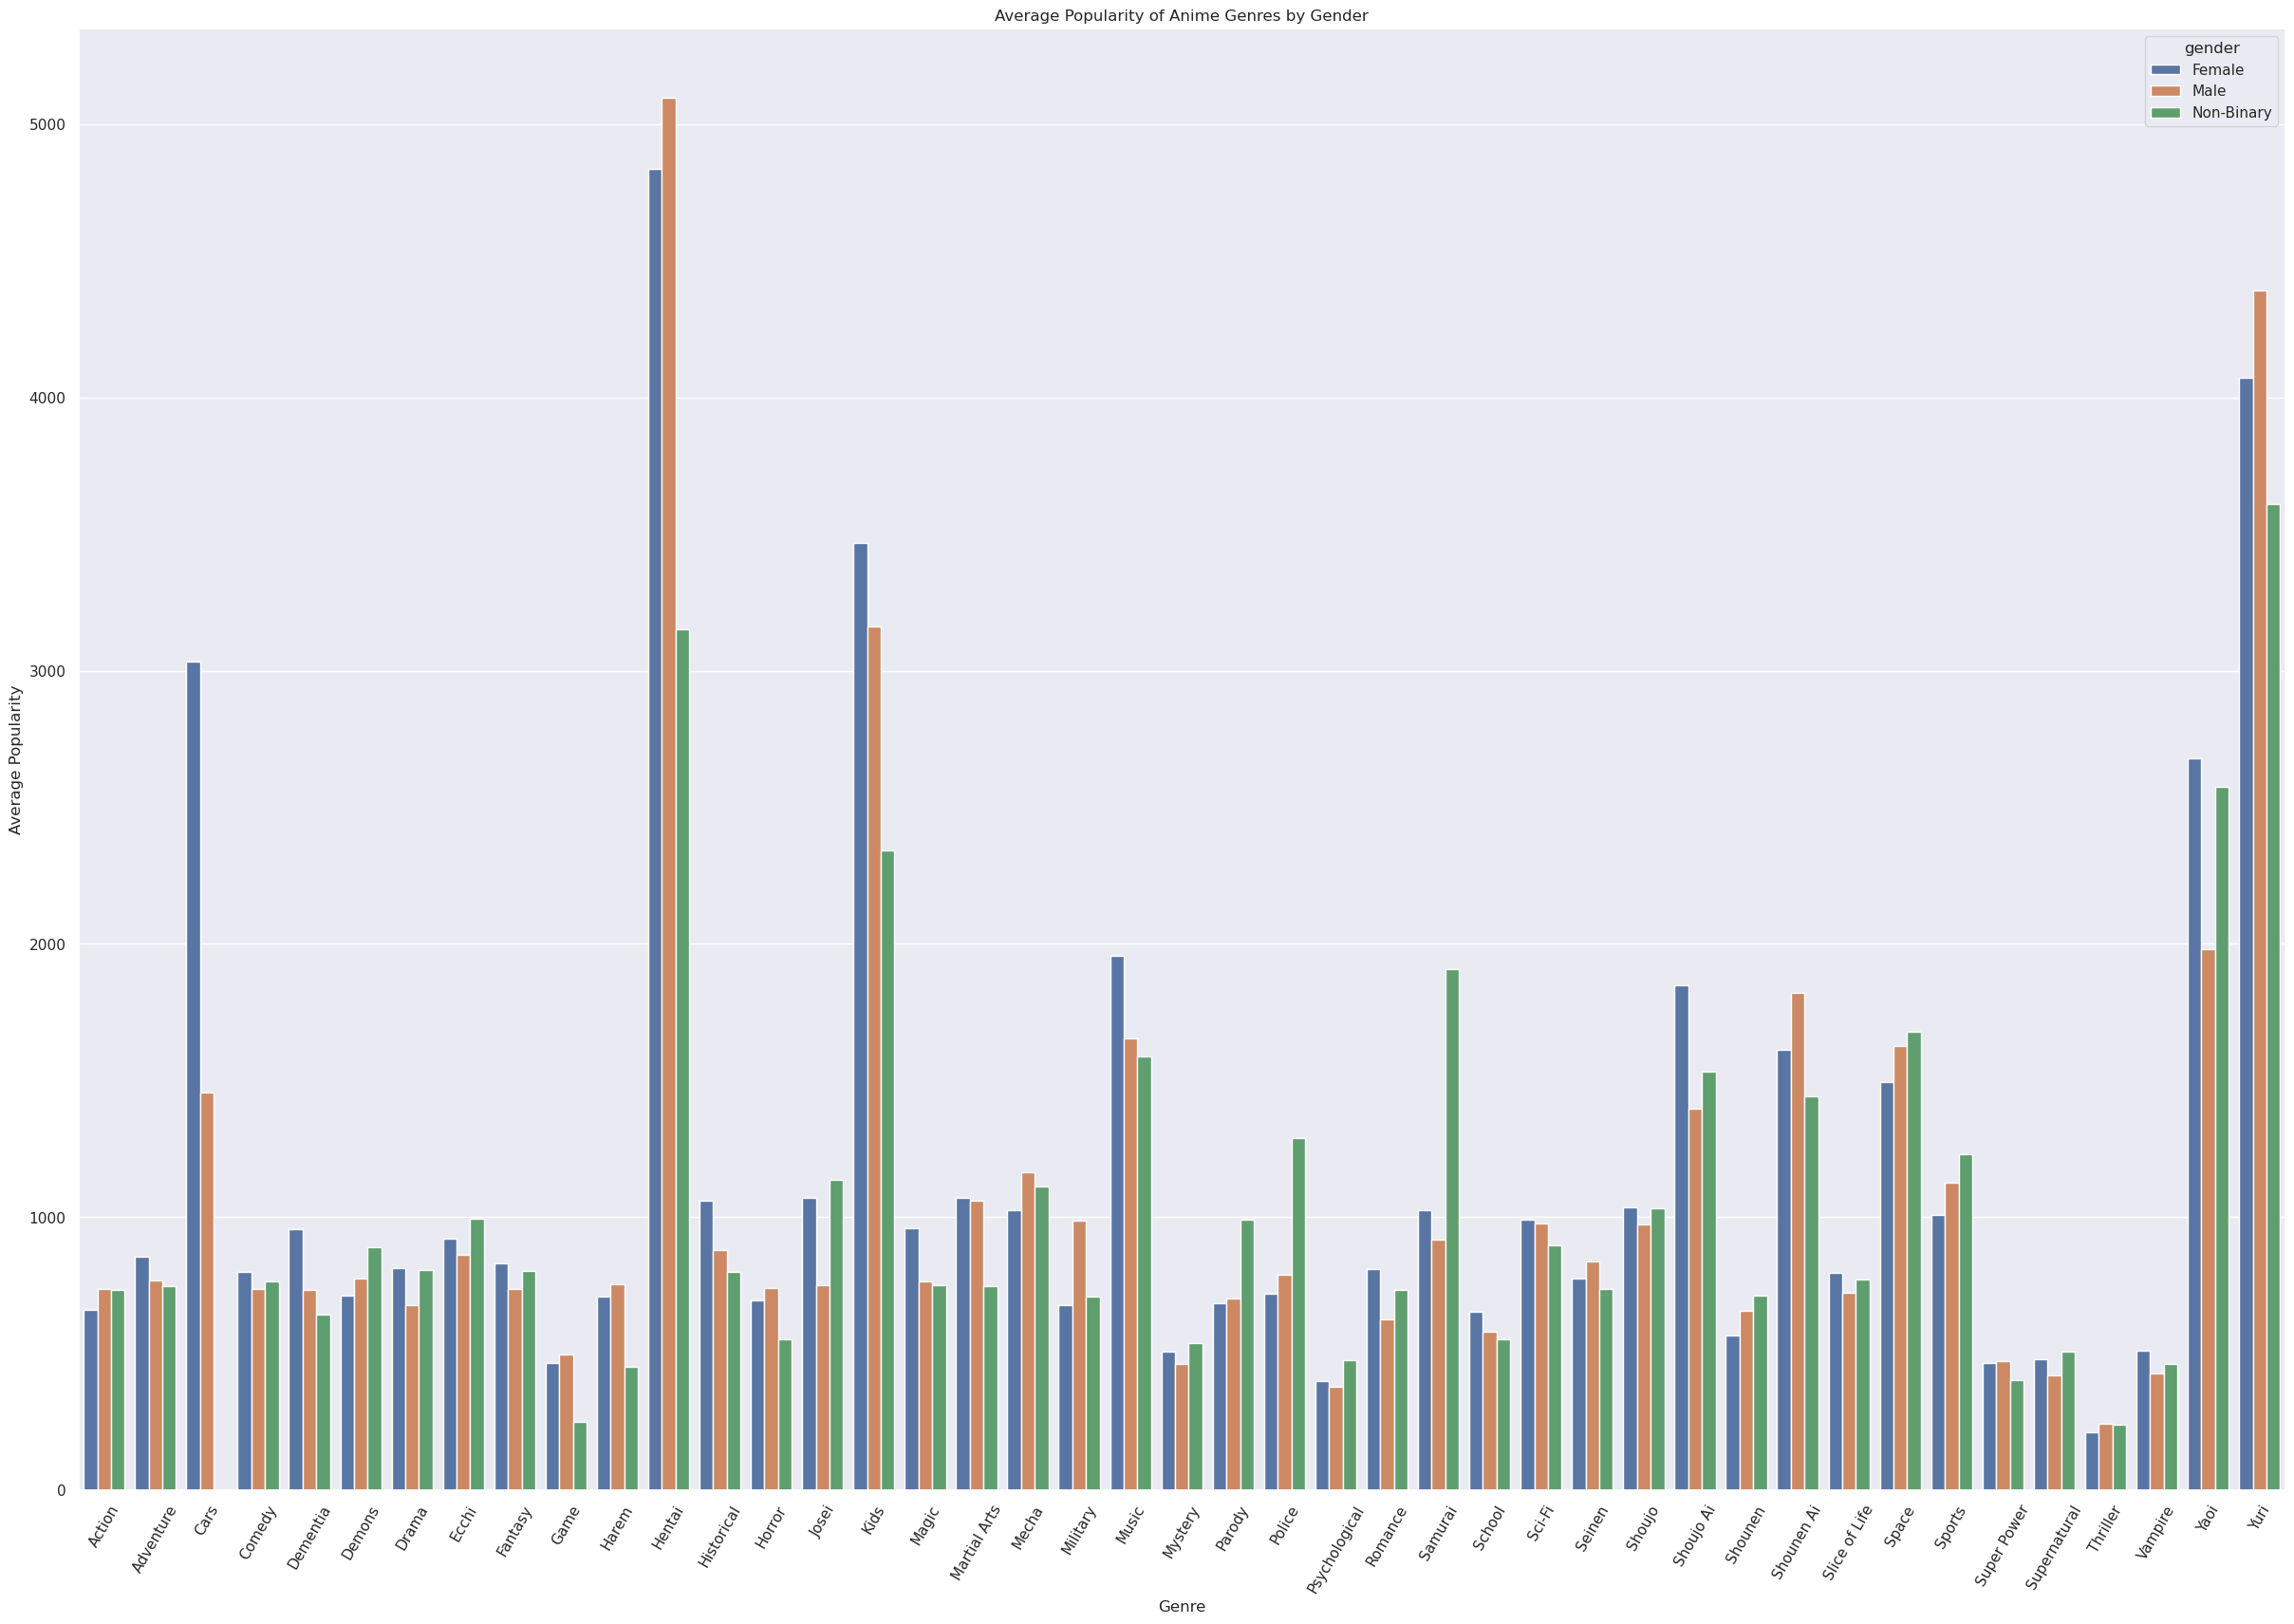

In [41]:
# Create a bar plot to visualize the average popularity of each genre by gender
plt.figure(figsize=(30, 20))
sns.barplot(x='genre', y='popularity', hue='gender', data=popularity_by_gender_genre)
plt.title('Average Popularity of Anime Genres by Gender')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=60) 
plt.show()

Q.	Do male and female users differ in their preference for subgenres within a particular anime genre?

In [42]:
merged_df.sample()

,index_x,uid_x,title,synopsis,genre,aired,episodes,members,popularity,ranked,score_x,img_url,link_x,uid_y,profile,anime_uid,text,score_y,scores,link_y,Overall_Scores,Story_Scores,Animation_Scores,Sound_Scores,Character_Scores,Enjoyment_Scores,index_y,gender,birthday,favorites_anime,link
100342,589,9617,K-On! Movie,Graduation looms for the founding members of t...,Music,"Dec 3, 2011",1.0,186515,581,205.0,8.33,https://cdn.myanimelist.net/images/anime/5/762...,https://myanimelist.net/anime/9617/K-On_Movie,281408,OVERPOWERED99,9617,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '9', 'Animation': '...",https://myanimelist.net/reviews.php?id=281408,10,9,10,10,10,10,79386,Male,"Nov 16, 2000",21647,https://myanimelist.net/profile/OVERPOWERED99


In [43]:
merged_df.columns

Index(['index_x', 'uid_x', 'title', 'synopsis', 'genre', 'aired', 'episodes',
       'members', 'popularity', 'ranked', 'score_x', 'img_url', 'link_x',
       'uid_y', 'profile', 'anime_uid', 'text', 'score_y', 'scores', 'link_y',
       'Overall_Scores', 'Story_Scores', 'Animation_Scores', 'Sound_Scores',
       'Character_Scores', 'Enjoyment_Scores', 'index_y', 'gender', 'birthday',
       'favorites_anime', 'link'],
      dtype='object')

Q.	Is there a correlation between the gender of the user and the average rating for anime of different genres?

In [44]:
# Group the data by 'genre' and 'gender' and calculate the average score
average_score_by_gender_genre = merged_df.groupby(['genre', 'gender'])['score_y'].mean().reset_index()

# Create a pivot table for correlation analysis
pivot_score_gender = pd.pivot_table(average_score_by_gender_genre, values='score_y', index='genre', columns='gender')

# Since we only have two genders, we can calculate the correlation between them directly
correlation = pivot_score_gender['Female'].corr(pivot_score_gender['Male'])

correlation


0.8708475774559452

Q.	How does the gender of the user affect their engagement with different anime genres (e.g., number of episodes watched, time spent watching, etc.)?

In [45]:
merged_df.sample()

,index_x,uid_x,title,synopsis,genre,aired,episodes,members,popularity,ranked,score_x,img_url,link_x,uid_y,profile,anime_uid,text,score_y,scores,link_y,Overall_Scores,Story_Scores,Animation_Scores,Sound_Scores,Character_Scores,Enjoyment_Scores,index_y,gender,birthday,favorites_anime,link
9721637,17757,11741,Fate/Zero 2nd Season,As the Fourth Holy Grail War rages on with no ...,Action,"Apr 8, 2012 to Jun 24, 2012",12.0,633594,86,55.0,8.62,https://cdn.myanimelist.net/images/anime/8/411...,https://myanimelist.net/anime/11741/Fate_Zero_...,240154,XenoFate,11741,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=240154,10,10,10,10,10,10,36249,Male,NaN,5114,https://myanimelist.net/profile/XenoFate


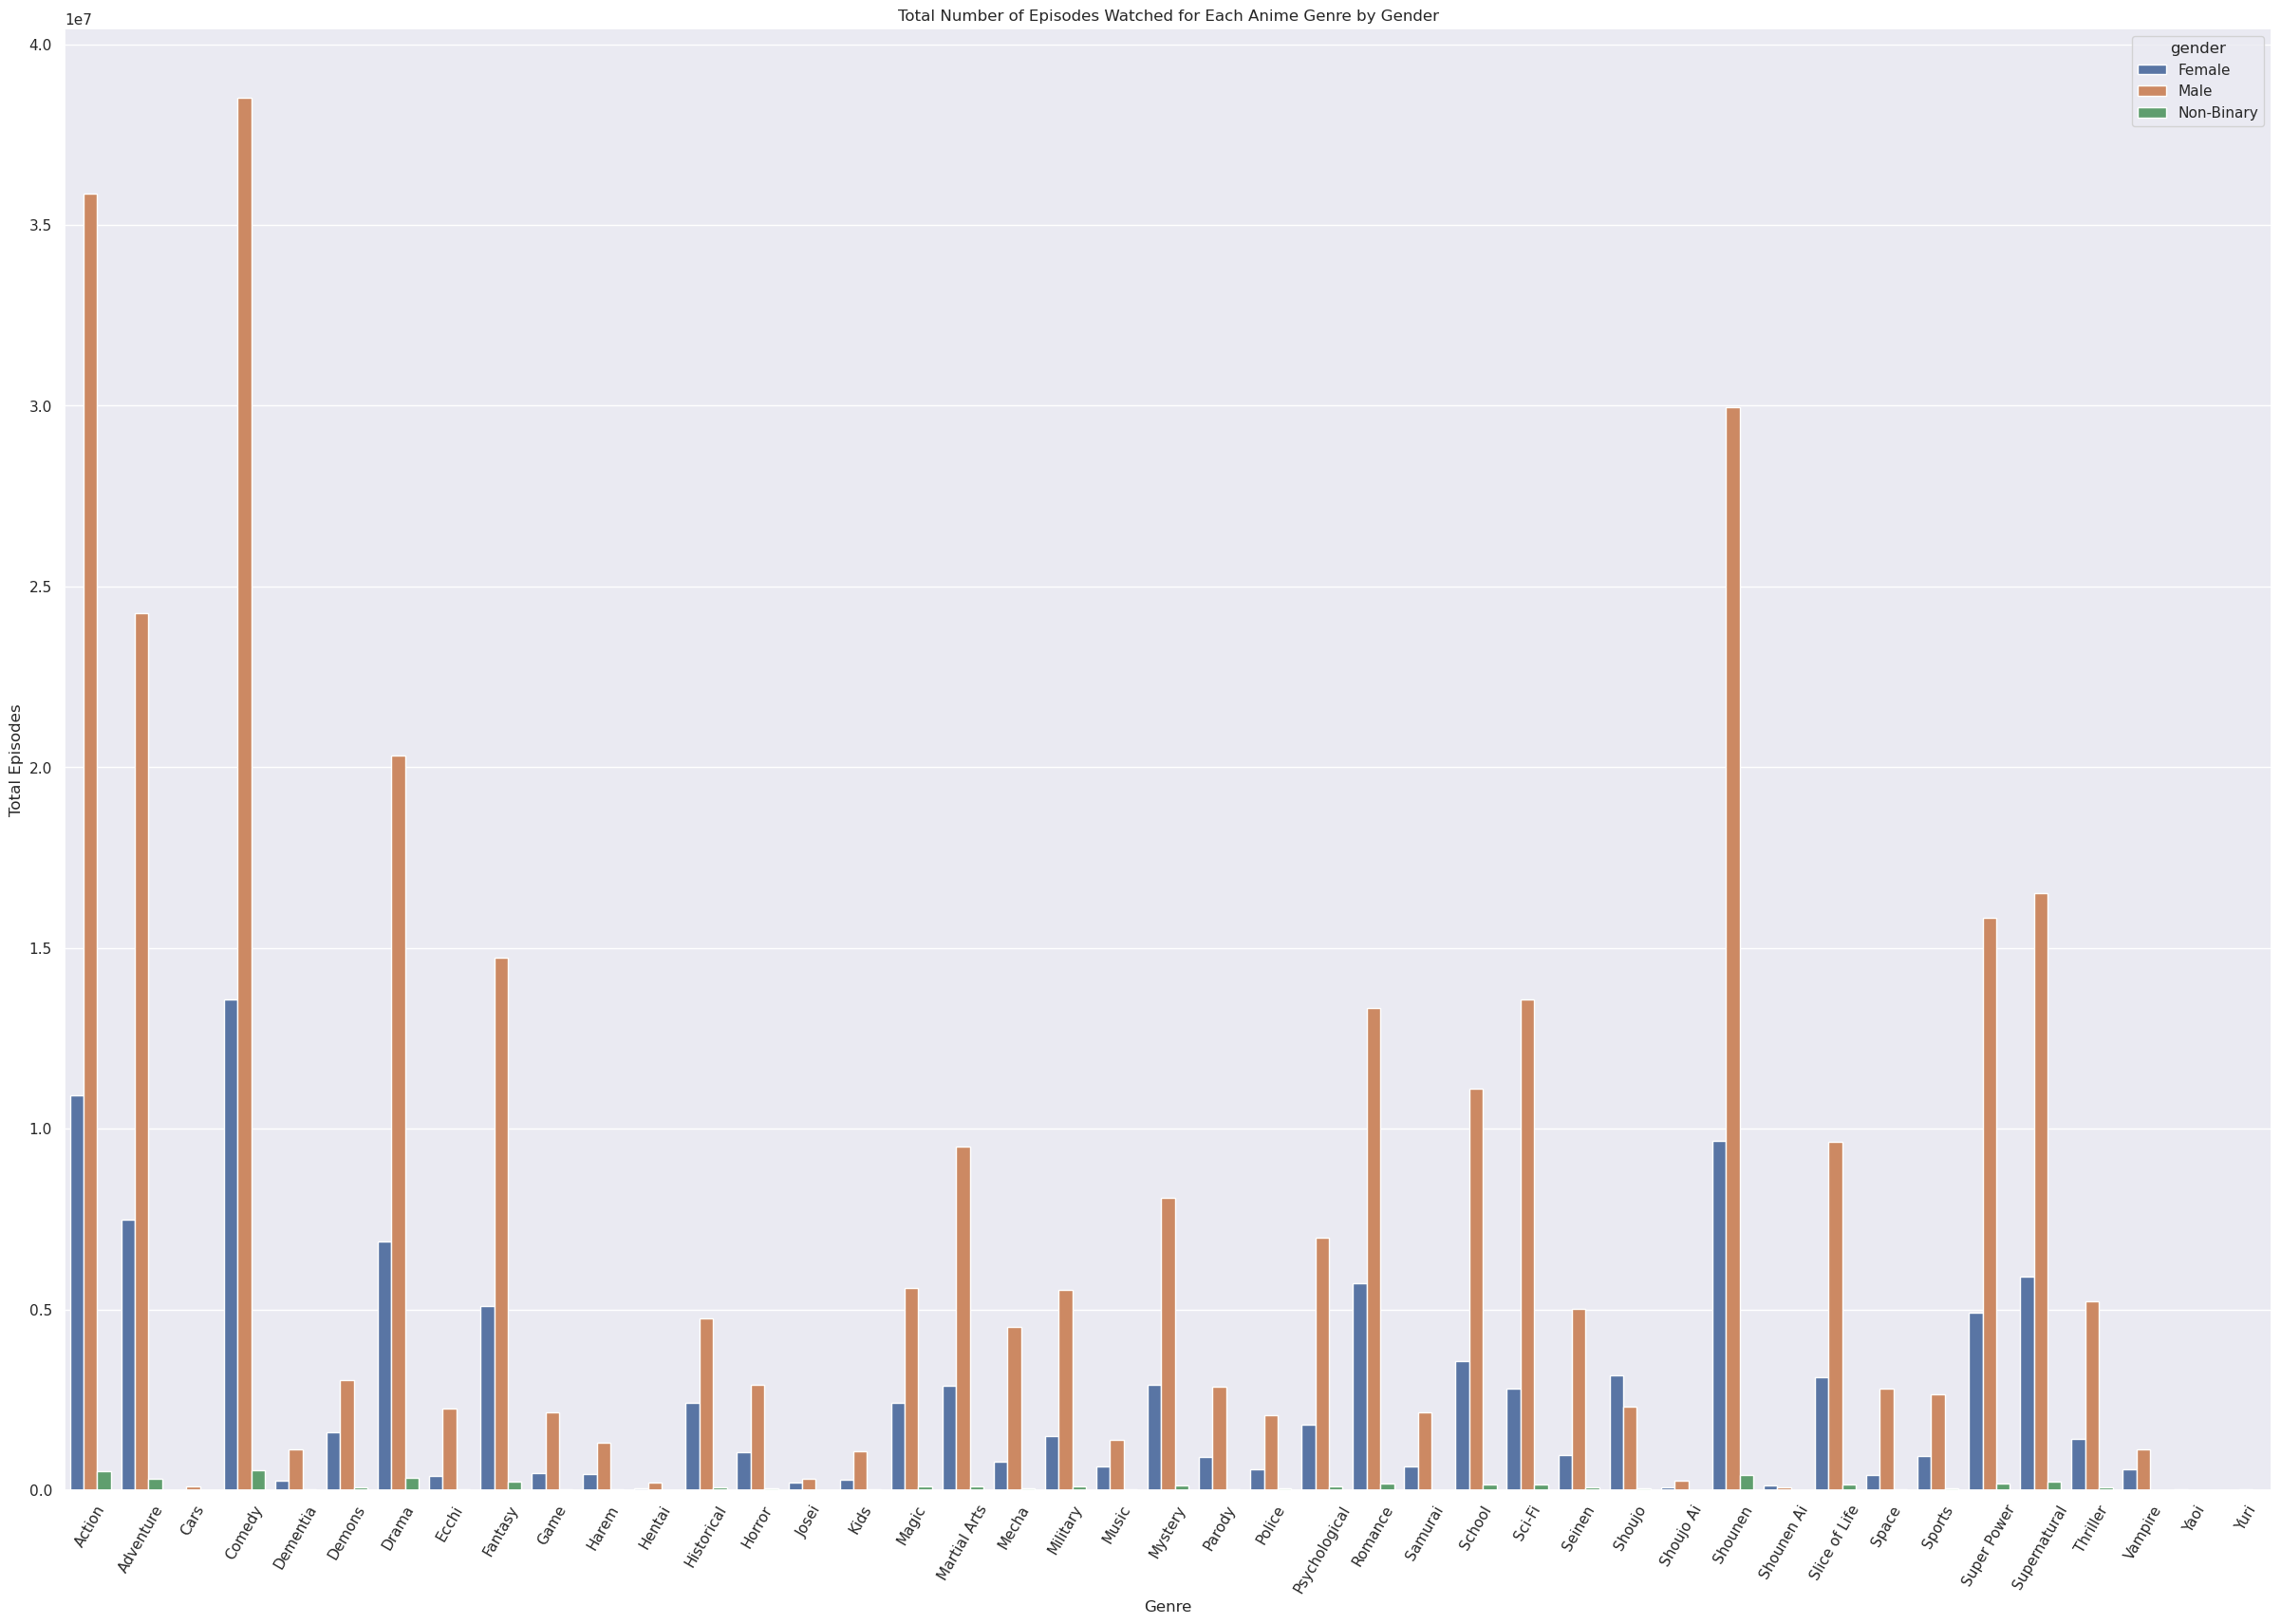

In [46]:
# Group the data by 'genre' and 'gender' and calculate the total number of episodes
total_episodes_by_gender_genre = merged_df.groupby(['genre', 'gender'])['episodes'].sum().reset_index()

# Create a bar plot to visualize the total number of episodes watched for each genre by gender
plt.figure(figsize=(30, 20))
sns.barplot(x='genre', y='episodes', hue='gender', data=total_episodes_by_gender_genre)
plt.title('Total Number of Episodes Watched for Each Anime Genre by Gender')
plt.xlabel('Genre')
plt.ylabel('Total Episodes')
plt.xticks(rotation=60) 
plt.show()


In [47]:
least_popular_genre_by_gender = total_episodes_by_gender_genre.loc[total_episodes_by_gender_genre.groupby('gender')['episodes'].idxmin()]
least_popular_genre_by_gender

,genre,gender,episodes
125,Yuri,Female,3720.0
123,Yaoi,Male,11040.0
127,Yuri,Non-Binary,352.0


In [48]:
most_popular_genre_by_gender = total_episodes_by_gender_genre.loc[total_episodes_by_gender_genre.groupby('gender')['episodes'].idxmax()]
most_popular_genre_by_gender

,genre,gender,episodes
8,Comedy,Female,13586296.0
9,Comedy,Male,38509919.0
10,Comedy,Non-Binary,551053.0


Q8.	Are there gender-based variations in the perception of character development and storytelling in different anime genres?

In [49]:
# Group the data by 'genre' and 'gender' and calculate the average story and character scores
average_scores_by_gender_genre = merged_df.groupby(['genre', 'gender'])[['Story_Scores', 'Character_Scores']].mean().reset_index()

# Display the data
average_scores_by_gender_genre

,genre,gender,Story_Scores,Character_Scores
0,Action,Female,7.539289,7.662400
1,Action,Male,6.824971,7.054397
2,Action,Non-Binary,6.362701,6.620787
3,Adventure,Female,7.781846,7.871159
4,Adventure,Male,7.011348,7.275261
...,...,...,...,...
123,Yaoi,Male,3.736430,4.146699
124,Yaoi,Non-Binary,3.245700,3.449631
125,Yuri,Female,4.836898,4.919786
126,Yuri,Male,4.360193,5.266529


/tmp/ipykernel_32/705916541.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='genre', y='Average Score', hue='gender', data=melted_df, ci=None)


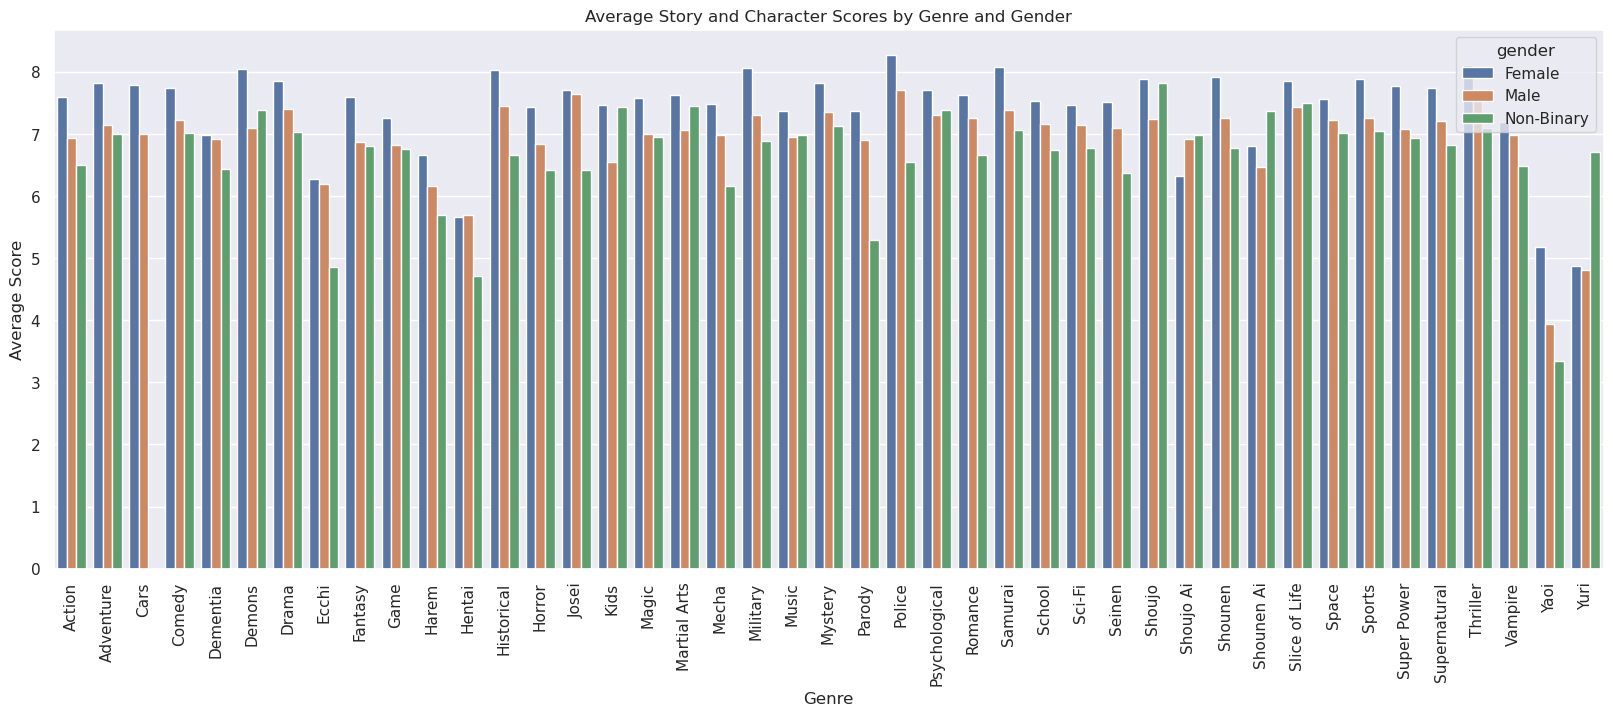

In [50]:
# Melt the dataframe to create a suitable format for the seaborn barplot function
melted_df = pd.melt(average_scores_by_gender_genre, id_vars=['genre', 'gender'], value_vars=['Story_Scores', 'Character_Scores'],
                    var_name='Score Type', value_name='Average Score')

# Create a barplot
plt.figure(figsize=(20, 7))
sns.barplot(x='genre', y='Average Score', hue='gender', data=melted_df, ci=None)
plt.title('Average Story and Character Scores by Genre and Gender')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()

In [51]:
most_popular_genre_by_gender_story = average_scores_by_gender_genre.loc[average_scores_by_gender_genre.groupby('gender')['Story_Scores'].idxmax()]
most_popular_genre_by_gender_story

,genre,gender,Story_Scores,Character_Scores
68,Police,Female,8.286859,8.242399
117,Thriller,Male,7.807393,7.636924
91,Shoujo,Non-Binary,7.706986,7.937257


In [52]:
most_popular_genre_by_gender_char = average_scores_by_gender_genre.loc[average_scores_by_gender_genre.groupby('gender')['Character_Scores'].idxmax()]
most_popular_genre_by_gender_char

,genre,gender,Story_Scores,Character_Scores
77,Samurai,Female,7.861265,8.294542
42,Josei,Male,7.484503,7.785080
52,Martial Arts,Non-Binary,6.867612,8.017730


In [53]:
least_popular_genre_by_gender_story = average_scores_by_gender_genre.loc[average_scores_by_gender_genre.groupby('gender')['Story_Scores'].idxmin()]
least_popular_genre_by_gender_story

,genre,gender,Story_Scores,Character_Scores
125,Yuri,Female,4.836898,4.919786
123,Yaoi,Male,3.736430,4.146699
124,Yaoi,Non-Binary,3.245700,3.449631


In [54]:
least_popular_genre_by_gender_char = average_scores_by_gender_genre.loc[average_scores_by_gender_genre.groupby('gender')['Character_Scores'].idxmin()]
least_popular_genre_by_gender_char

,genre,gender,Story_Scores,Character_Scores
125,Yuri,Female,4.836898,4.919786
123,Yaoi,Male,3.736430,4.146699
124,Yaoi,Non-Binary,3.245700,3.449631


Q.	Do male and female users have different expectations and preferences for art styles in anime genres?

In [55]:
merged_df.genre.unique()

array(['Comedy', 'Sports', 'Drama', 'School', 'Shounen', 'Action',
       'Sci-Fi', 'Parody', 'Super Power', 'Supernatural', 'Seinen',
       'Mecha', 'Slice of Life', 'Demons', 'Shoujo', 'Space', 'Mystery',
       'Police', 'Psychological', 'Thriller', 'Military', 'Martial Arts',
       'Josei', 'Harem', 'Magic', 'Ecchi', 'Adventure', 'Fantasy', 'Game',
       'Dementia', 'Horror', 'Romance', 'Historical', 'Samurai', 'Music',
       'Shounen Ai', 'Kids', 'Vampire', 'Shoujo Ai', 'Hentai', 'Yuri',
       'Yaoi', 'Cars', nan], dtype=object)

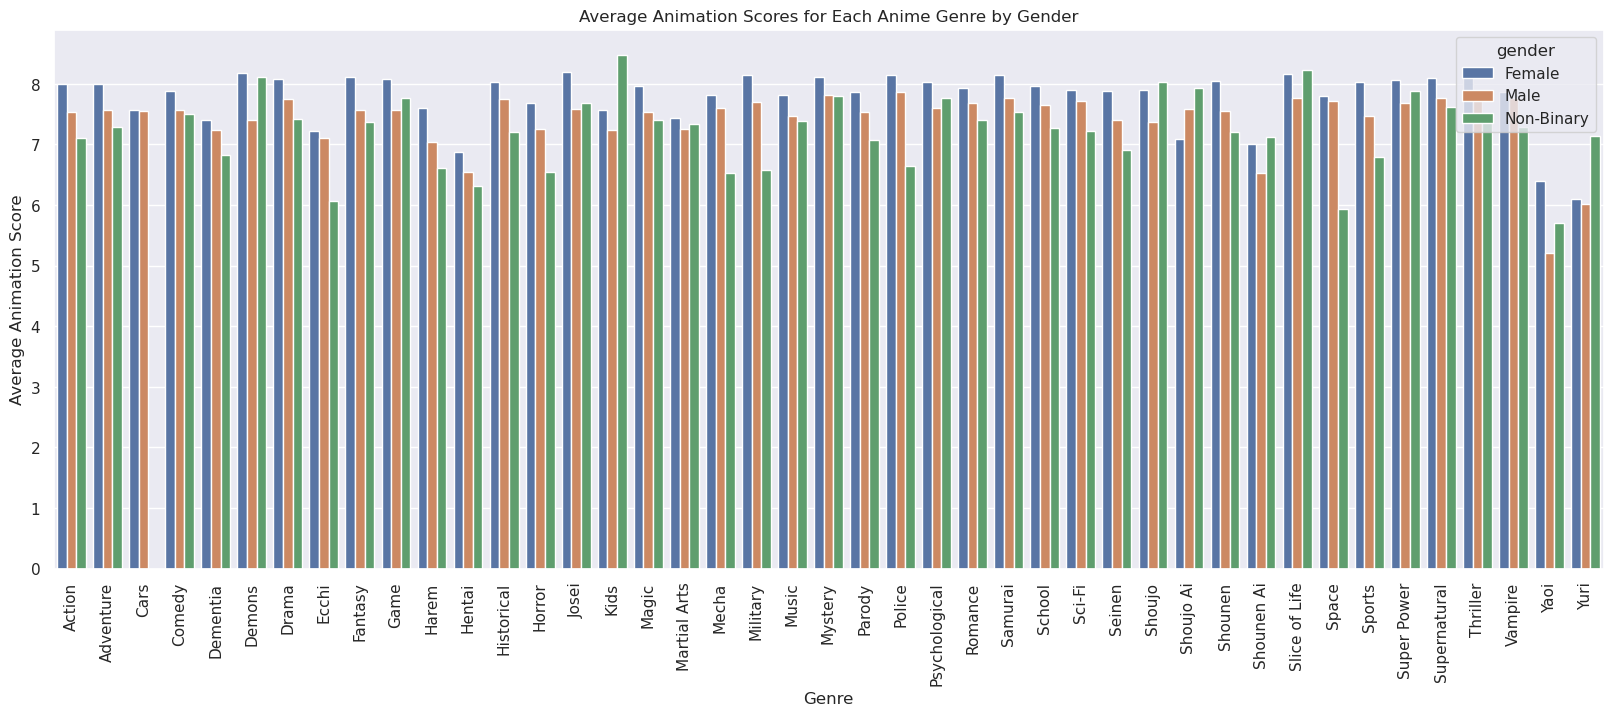

In [56]:
# Group the data by 'genre' and 'gender' and calculate the average animation scores
average_animation_scores_by_gender_genre = merged_df.groupby(['genre', 'gender'])['Animation_Scores'].mean().reset_index()

# Create a bar plot to visualize the average animation scores for each genre by gender
plt.figure(figsize=(20, 7))
sns.barplot(x='genre', y='Animation_Scores', hue='gender', data=average_animation_scores_by_gender_genre)
plt.title('Average Animation Scores for Each Anime Genre by Gender')
plt.xlabel('Genre')
plt.ylabel('Average Animation Score')
plt.xticks(rotation=90)
plt.show()


Q.	 How does the gender of the user impact their likelihood of rewatching anime of different genres?

In [57]:
merged_df.sample()

,index_x,uid_x,title,synopsis,genre,aired,episodes,members,popularity,ranked,score_x,img_url,link_x,uid_y,profile,anime_uid,text,score_y,scores,link_y,Overall_Scores,Story_Scores,Animation_Scores,Sound_Scores,Character_Scores,Enjoyment_Scores,index_y,gender,birthday,favorites_anime,link
8447608,1093,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...",Shoujo,"Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73,https://cdn.myanimelist.net/images/anime/2/201...,https://myanimelist.net/anime/123/Fushigi_Yuugi,8675,Bishounen_Hunter,123,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '6', 'Animation': '7...",https://myanimelist.net/reviews.php?id=8675,7,6,7,6,7,6,27838,Male,NaN,93,https://myanimelist.net/profile/Bishounen_Hunter


In [59]:
# Identify users who have rewatched an anime (more than one review for the same title)
rewatch_data = merged_df[merged_df.duplicated(subset=['uid_x', 'title'], keep=False)]

# Group by 'genre' and 'gender' and count the number of rewatches
rewatch_counts_by_gender_genre = rewatch_data.groupby(['genre', 'gender']).size().reset_index(name='rewatch_count')
rewatch_counts_by_gender_genre

,genre,gender,rewatch_count
0,Action,Female,289203
1,Action,Male,1176521
2,Action,Non-Binary,19137
3,Adventure,Female,163178
4,Adventure,Male,633040
...,...,...,...
123,Yaoi,Male,8180
124,Yaoi,Non-Binary,1628
125,Yuri,Female,1496
126,Yuri,Male,5808


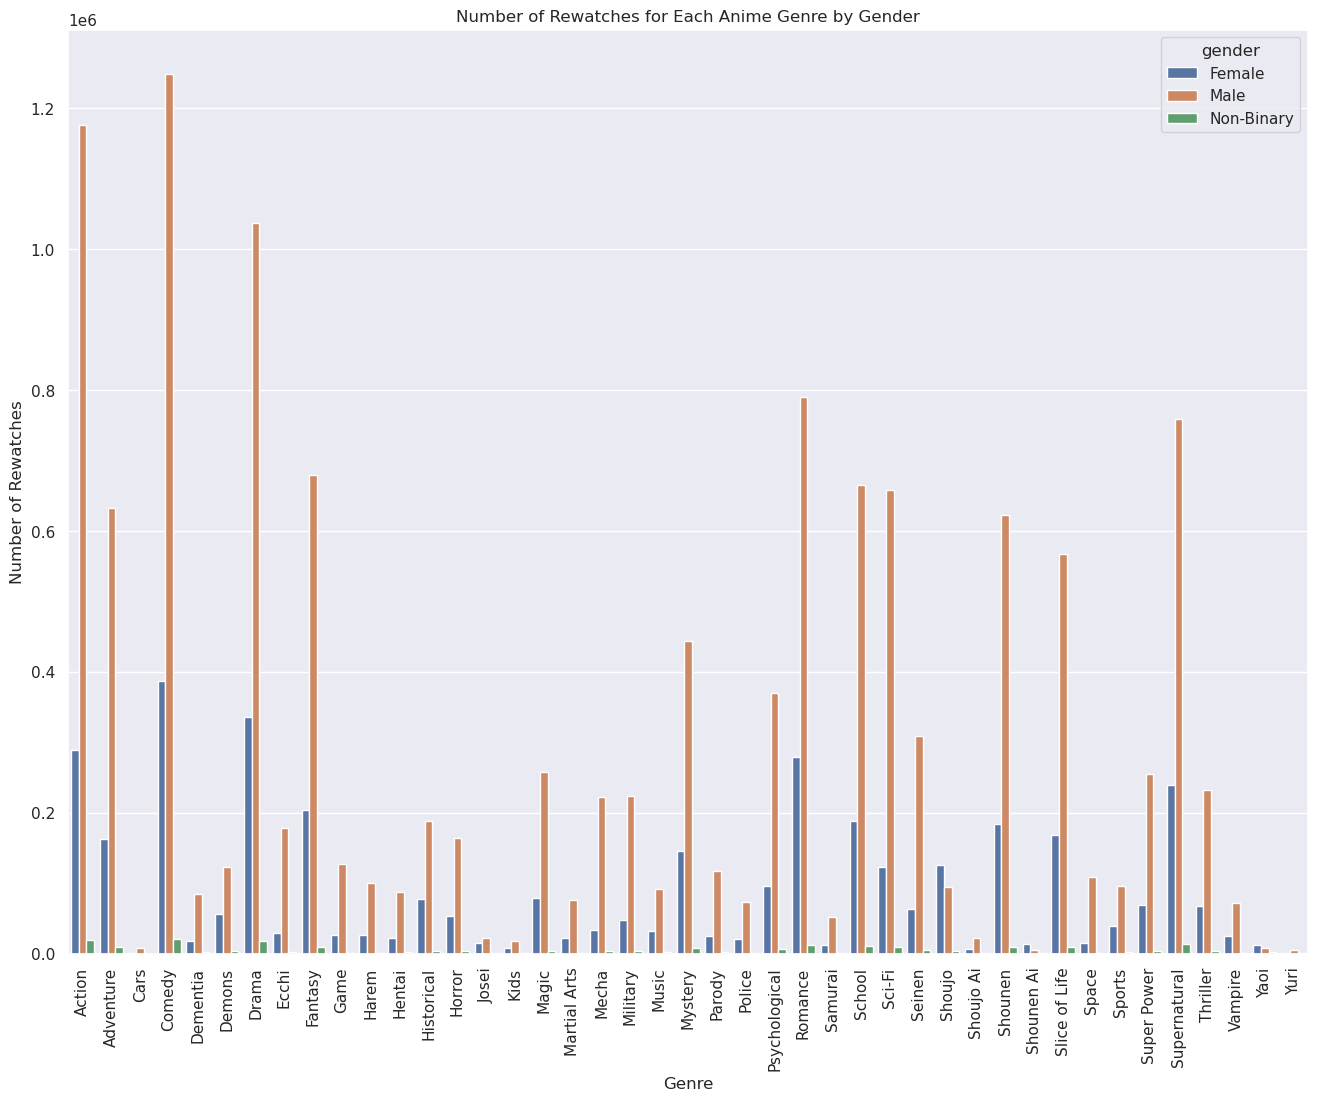

In [61]:
# Create a bar plot to visualize the rewatch counts for each genre by gender
plt.figure(figsize=(16, 12))
sns.barplot(x='genre', y='rewatch_count', hue='gender', data=rewatch_counts_by_gender_genre)
plt.title('Number of Rewatches for Each Anime Genre by Gender')
plt.xlabel('Genre')
plt.ylabel('Number of Rewatches')
plt.xticks(rotation=90)
plt.show()

In [62]:
rewatch_counts_by_gender_genre = rewatch_data.groupby(['genre', 'gender']).size().reset_index(name='rewatch_count')
most_rewatched = rewatch_counts_by_gender_genre.loc[rewatch_counts_by_gender_genre.groupby('gender')['rewatch_count'].idxmax()]
most_rewatched

,genre,gender,rewatch_count
8,Comedy,Female,386282
9,Comedy,Male,1248805
10,Comedy,Non-Binary,20277


In [63]:
rewatch_counts_by_gender_genre = rewatch_data.groupby(['genre', 'gender']).size().reset_index(name='rewatch_count')
least_rewatched = rewatch_counts_by_gender_genre.loc[rewatch_counts_by_gender_genre.groupby('gender')['rewatch_count'].idxmin()]
least_rewatched

,genre,gender,rewatch_count
6,Cars,Female,608
99,Shounen Ai,Male,5116
43,Josei,Non-Binary,229
